**1. Multimodel Parsing(Extraction)**

![Sunny Savita - Realtime Multimodal RAG Usecase Part 1 Extract Image,Table,Text from Documents #rag #multimodal [ABK00e2XdPo - 782x440 - 6m40s].png](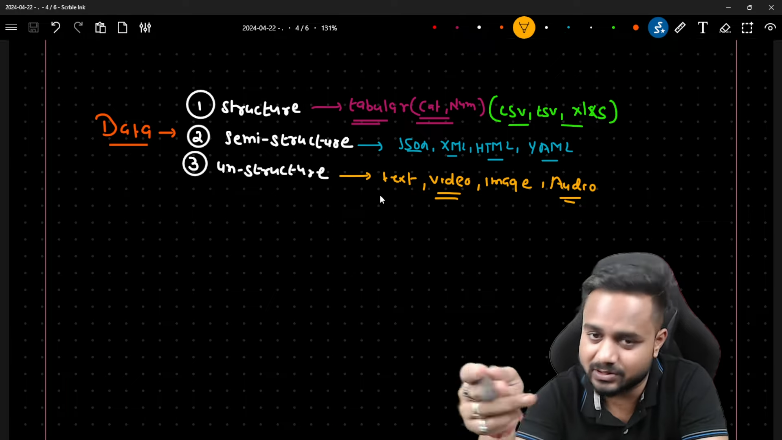)

![Sunny Savita - Realtime Multimodal RAG Usecase Part 1 Extract Image,Table,Text from Documents #rag #multimodal [ABK00e2XdPo - 782x440 - 10m27s].png](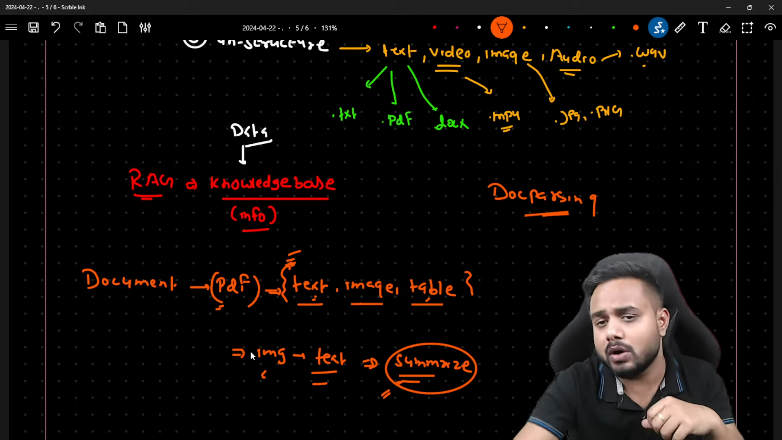)

In [ ]:
! pip install "unstructured[all-docs]" pillow pydantic lxml matplotlib

In [ ]:
!sudo apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,563 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,631 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,517

In [ ]:
!pip install pytesseract


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 50 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,570 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!sudo apt-get install libleptonica-dev tesseract-ocr libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn

not available in pip

In [ ]:
!pip install unstructured-pytesseract

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.


In [ ]:
import pytesseract
print(pytesseract.get_tesseract_version())

4.1.1


In [ ]:
from unstructured.partition.pdf import partition_pdf

In [ ]:
!sudo apt install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 50 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 0s (761 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 123976 

In [ ]:
# responsible for extracting information : not only text, images, tables as well

raw_pdf_elements = partition_pdf(
    filename="/content/data/PBI-20-2357.pdf", # pdf contains text, images and tables as well. everythib will be handled
    strategy="hi_res",
    extract_images_in_pdf=True,
    extract_image_block_types=["Image", "Table"],
    extract_image_block_to_payload=False,
    extract_image_block_output_dir="extracted_data"
  )

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

In [ ]:
raw_pdf_elements

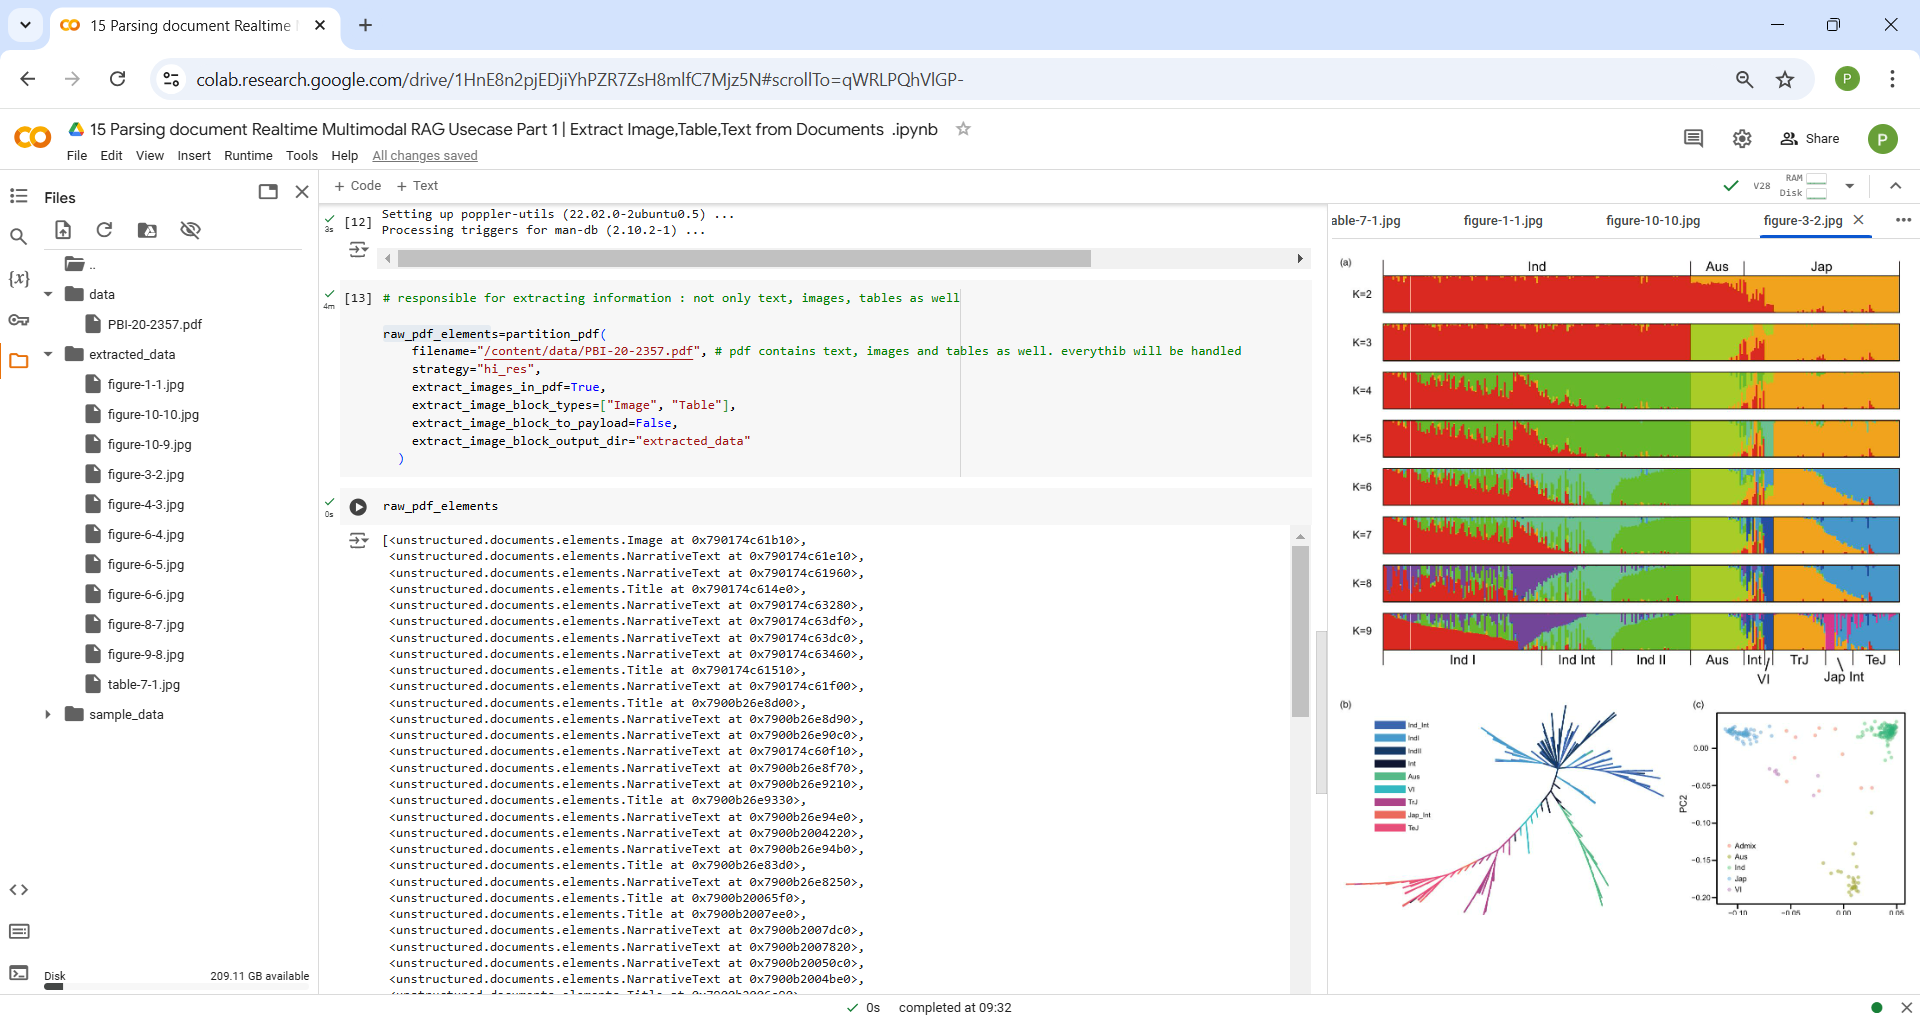

So it has captured all the elements from the pdf, including table, image etc.

In [ ]:
Header=[]
Footer=[]
Title=[]
NarrativeText=[]
Text=[]
ListItem=[]


for element in raw_pdf_elements:
  if "unstructured.documents.elements.Header" in str(type(element)):
            Header.append(str(element))
  elif "unstructured.documents.elements.Footer" in str(type(element)):
            Footer.append(str(element))
  elif "unstructured.documents.elements.Title" in str(type(element)):
            Title.append(str(element))
  elif "unstructured.documents.elements.NarrativeText" in str(type(element)):
            NarrativeText.append(str(element))
  elif "unstructured.documents.elements.Text" in str(type(element)):
            Text.append(str(element))
  elif "unstructured.documents.elements.ListItem" in str(type(element)):
            ListItem.append(str(element))


In [ ]:

NarrativeText


['Plant Biotechnology Journal (2022) 20, pp. 2357–2371',
 'doi: 10.1111/pbi.13912',
 'Chang Liu1, Xiya Zhu1, Jin Zhang1, Meng Shen1, Kai Chen1, Xiangkui Fu1, Lian Ma1, Xuelin Liu1, Chang Zhou1, Dao-Xiu Zhou1,2 and Gongwei Wang1,*',
 '1National Key Laboratory of Crop Genetic Improvement, Hubei Hongshan Laboratory, Huazhong Agricultural University, Wuhan, China 2Institute of Plant Science Paris-Saclay (IPS2), CNRS, INRAE, University Paris-Saclay, Orsay, France',
 'Received 17 June 2022; revised 11 August 2022; accepted 13 August 2022. *Correspondence (Tel +86-15827398206; fax +86-27-87280916; email gwwang@mail.hzau.edu.cn)',
 'Keywords: population RNA-seq, expression quantitative trait loci (eQTLs), diterpenoid antitoxin, key regulators, transcriptome-wide association study (TWAS).',
 'The regulation of gene expression plays an essential role in both the phenotype and adaptation of plants. Transcriptome sequencing enables simultaneous identiﬁcation of exonic variants and quantiﬁcation of

Read the text also very nicely.

Each and every data we are able to capture.

In [ ]:

ListItem

['2370 Chang Liu et al.',
 'Kim, D., Pertea, G., Trapnell, C., Pimentel, H., Kelley, R. and Salzberg, S.L. (2013) TopHat2: accurate alignment of transcriptomes in the presence of insertions, deletions and gene fusions. Genome Biol. 14, R36.',
 'Kliebenstein, D. (2009) Quantitative genomics: analyzing intraspeciﬁc variation using global gene expression polymorphisms or eQTLs. Annu. Rev. Plant Biol. 60, 93–114.',
 'Krishnan, A., Guiderdoni, E., An, G., Hsing, Y.I.C., Han, C.D., Lee, M.C., Yu, S.M. et al. (2009) Mutant resources in rice for functional genomics of the grasses. Plant Physiol. 149, 165–170.',
 'Langfelder, P. and Horvath, S. (2008) WGCNA: an R package for weighted correlation network analysis. Bmc Bioinformatics, 9, 559.',
 'Laurentin, A. and Edwards, C.A. (2003) A microtiter modiﬁcation of the anthrone-sulfuric acid colorimetric assay for glucose-based carbohydrates. Anal. Biochem. 315, 143–145.',
 'Alexander, D.H., Novembre, J. and Lange, K. (2009) Fast model-based estimat

In [ ]:

Text=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.NarrativeText" in str(type(element)):
            Text.append(str(element))

In [ ]:
img=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Image" in str(type(element)):
            img.append(str(element))


In [ ]:

img[2]


'(a)  n  o  i  t  i  s  o  p     e  n  e  G  (b)  80  70  60  50  )  P  (  0  1  g  o  40  l  -  30  20  10  **  (c)  2  r     s  P  N  S  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1  **  0.0  SNP position  Local  Distant  Local  Distant  (d)  (e)  (f)  400  350  TSS-10kb  32.2%  25.4%  38.4%  36.2%  e  n  e  G  e     f  o     r  e  b  m  u  N  4000  3000  2000  L  T  Q  e     l  a  c  o  l     f  o     r  e  b  m  u  N  300  250  200  150  100  TSS-20kb  48.6%  TSS-30kb  60.5%  1000  50  local-regulated  distant-regulated  local- & distant-regulated  0  1  2  3  4  5  6  7  8  Number of eQTL  9 10 11 >=12  0  TSS 10K 20K 30K 40K 50K 60K 70K 80K 90K 100K  Distance '

parsed information of the image also

In [ ]:
tab=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Table" in str(type(element)):
            tab.append(str(element))

In [ ]:
tab[0]

'Gene_ID CHR bp P_value FDR Symbols. Annotation LOC_Os02g02670 Chr02 991 974 1.10 x 10-8 0.00014514 NBS-LRR disease resistance protein LOC_Os05g38950 ChrOS 22 838 503 1.24 x 10-8 0.00014514 TBC domain-containing protein LOC_Os09g27650 Chro9 16 823 960 7.31 x 10° 0.0005681 OsIDD13 ZOS9-14-C2H2 zinc finger protein LOC_Os02g02690 Chr02 1.010 137 2.77 x 10-7 0.00161314 Expressed protein LOC_Os01g04920 Chr01 2 276 969 1.24 x 10-6 0.00482646 OsSQD2 Glycosyl transferase, group 1 domain-containing protein LOC_Os05945770 ChrOS 26 508 840 1.22 x 10-° 0.00482646 Divergent PAP2 family domain-containing protein LOC_Os02956120 Chr02 34 349 219 1.66 x 10°° 0.00483869 OsIAAQ OsIAA9-Auxin-responsive Aux/IAA gene family member LOC_Os07g14700 Chr07 8 382 541 1.57 x 10°© 0.00483869 Harpin-induced protein 1 domain-containing protein LOC_Os02g27190 Chr02 16 001 144 2.02 x 10°° 0.00522673 Expressed protein LOC_Os02938040 Chr02 22 980 200 3.92 x 10°° 0.0091447 OsIRL2 Leucine-rich repeat family protein, putati

Parsing/OCR of images and table bhi ho gya.

Directly we can pass this tabular or image parsed data to the model/LLM

#**2. MultiModal Summrizer**

In [ ]:
!pip install langchain_core

In [ ]:
# !pip install langchain_openai

In [ ]:
!pip install -U langchain-google-genai

In [ ]:

len(tab)

1

In [ ]:
len(img)

10

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:

# Prompt
prompt_text = """You are an assistant tasked with summarizing tables for retrieval. \
    These summaries will be embedded and used to retrieve the raw table elements. \
    Give a concise summary of the table that is well optimized for retrieval. Table {element} """



In [ ]:

prompt = ChatPromptTemplate.from_template(prompt_text)

In [ ]:
import os
from google.colab import userdata
GOOGLE_API_TOKEN = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_TOKEN

In [ ]:
# gemini-1.5-pro : can only support text to text

## open ai hota to bs llm ki definition badlni pdti, baki sara same rhta :
## from langchain_openai import ChatOpenAI
## model = ChatOpenAI(temperature=0, model="gpt-4")

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash-exp",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [ ]:

summarize_chain = {"element": lambda x: x} | prompt | llm | StrOutputParser()

In [ ]:
table_summaries = []

In [ ]:

table_summaries = summarize_chain.batch(tab,{"max_concurrency": 5})

In [ ]:
tab[0]

'Gene_ID CHR bp P_value FDR Symbols. Annotation LOC_Os02g02670 Chr02 991 974 1.10 x 10-8 0.00014514 NBS-LRR disease resistance protein LOC_Os05g38950 ChrOS 22 838 503 1.24 x 10-8 0.00014514 TBC domain-containing protein LOC_Os09g27650 Chro9 16 823 960 7.31 x 10° 0.0005681 OsIDD13 ZOS9-14-C2H2 zinc finger protein LOC_Os02g02690 Chr02 1.010 137 2.77 x 10-7 0.00161314 Expressed protein LOC_Os01g04920 Chr01 2 276 969 1.24 x 10-6 0.00482646 OsSQD2 Glycosyl transferase, group 1 domain-containing protein LOC_Os05945770 ChrOS 26 508 840 1.22 x 10-° 0.00482646 Divergent PAP2 family domain-containing protein LOC_Os02956120 Chr02 34 349 219 1.66 x 10°° 0.00483869 OsIAAQ OsIAA9-Auxin-responsive Aux/IAA gene family member LOC_Os07g14700 Chr07 8 382 541 1.57 x 10°© 0.00483869 Harpin-induced protein 1 domain-containing protein LOC_Os02g27190 Chr02 16 001 144 2.02 x 10°° 0.00522673 Expressed protein LOC_Os02938040 Chr02 22 980 200 3.92 x 10°° 0.0091447 OsIRL2 Leucine-rich repeat family protein, putati

In [ ]:

table_summaries[0]

'This table lists genes with their chromosome location, base pair position, p-value, FDR, gene symbols, and annotation. It includes genes like NBS-LRR disease resistance protein, TBC domain-containing protein, and various other proteins with associated functions.\n'

In [ ]:
len(table_summaries)

1

HOHO gemini-2.0-flash-exp  : is able to summarize

In [ ]:
img[5]

'(b)  LOC_Os11g25510  LOC_Os01g04480  LOC_Os08g24770  LOC_Os01g04460  LOC_Os01g04580  LOC_Os01g02790  LOC_Os01g02780  LOC_Os01g02800  LOC_Os01g02840  LOC_Os05g47750  LOC_Os01g04570  LOC_Os01g04490  LOC_Os01g04520  LOC_Os01g49614  LOC_Os08g24630  LOC_Os03g40670  LOC_Os01g02770  LOC_Os01g02830  Os01g02730  LOC_Os01g02290  LOC_Os01g02760  LOC_Os01g02750  LOC_Os01g02600  LOC_Os01g02300  LOC_Os01g02360  LOC_Os08g42390  LOC_Os11g12800  LOC_Os01g02560  LOC_Os01g02550  LOC_Os01g49580  LOC_Os01g02580  LOC_Os01g02700  LOC_Os01g02350  LOC_Os01g02610  LOC_Os01g02320  LOC_Os01g02690  LOC_Os02g31030  LOC_Os01g02570  LOC_Os01g02390  LOC_Os01g02400  LOC_Os01g02430  LOC_Os01g02420  LOC_Os08g39350  LOC_Os04g32320  (c)  740K  760K  780K  860K 870K  940K  960K  980K  1000K  (e)  t  n  e  t  n  o  c     h  c  r  a  t  S  75  50  25  1  0.8  0.6  0.4  0.2  0  −0.2  −0.4  −0.6  −0.8  −1  n = 468/48  p = 5.44 × 10−15  t  n  e  t  n  o  c     h  c  r  a  t  S  (f)  60  40  20  LOC_Os01g02400  n = 272  r  = −0.

In [ ]:
import base64
import os
from langchain_core.messages import HumanMessage

In [ ]:
def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [ ]:
def image_summarize(img_base64, prompt):
    """Make image summary"""


    # chat = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=1024)  : openai no more free

    chat = ChatGoogleGenerativeAI( model="gemini-2.0-flash-exp", temperature=0,  max_tokens=None,
                                   timeout=None, max_retries=2,)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},

                     {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content


In [ ]:
def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and used to retrieve the raw image. \
    Give a concise summary of the image that is well optimized for retrieval."""


    base64_image = encode_image(path)
    img_base64_list.append(base64_image)
    image_summaries.append(image_summarize(base64_image, prompt))

    return img_base64_list, image_summaries

In [ ]:

fpath="/content/extracted_data/figure-6-6.jpg"

In [ ]:
img_base64_list,image_summaries = generate_img_summaries(fpath)

In [ ]:
image_summaries[7]

'The image contains three plots: a network graph of gene interactions, a heatmap of linkage disequilibrium, and two scatter plots showing starch content. The network graph shows interconnected nodes labeled with gene names. The heatmap displays linkage disequilibrium patterns with a color scale. The scatter plots show starch content distributions and correlations with gene expression.'

In [ ]:
len(image_summaries)

11

Wah kya mst summarize kiya gemini-2.0-flash-exp model ne. Maja aa gya.

Let's see what was the image actually



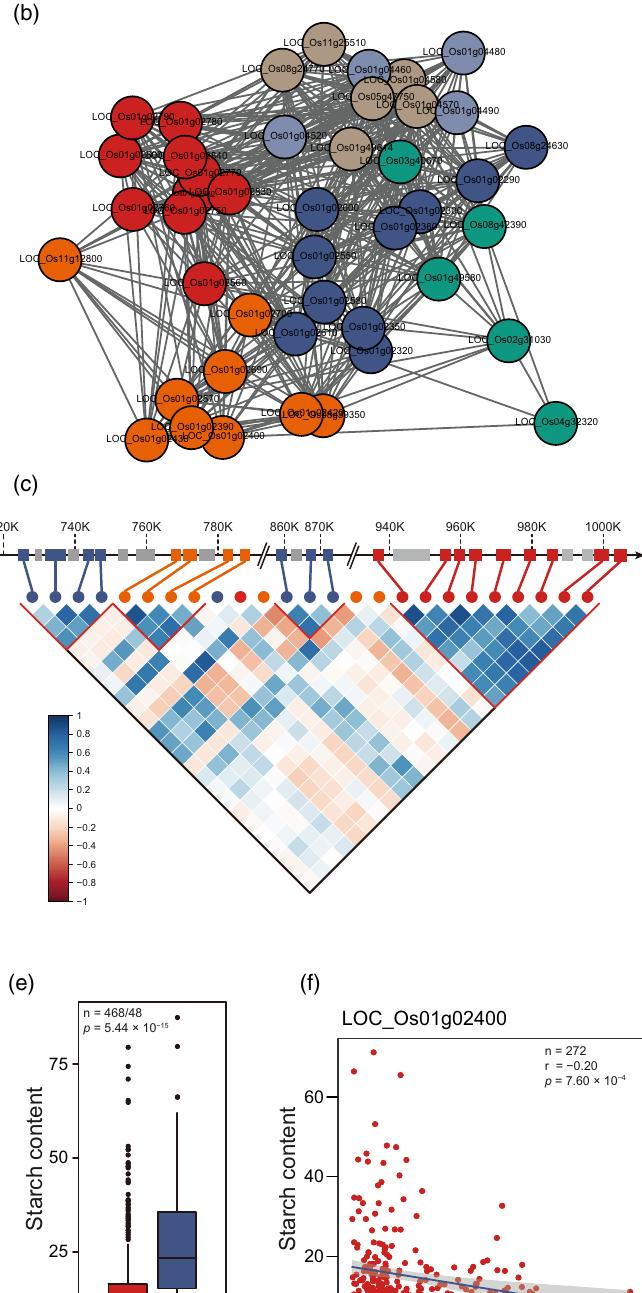

In [ ]:
from PIL import Image
img = Image.open("/content/extracted_data/figure-6-6.jpg")
display(img)

In [ ]:
## Summarizing multiple images

def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and used to retrieve the raw image. \
    Give a concise summary of the image that is well optimized for retrieval."""

    # Apply to images
    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))


    return img_base64_list, image_summaries

In [ ]:
fpath="/content/extracted_data/"

In [ ]:
# Image summaries
img_base64_list, image_summaries = generate_img_summaries(fpath)

In [ ]:
image_summaries

['Green banner with "Plant Biotechnology Journal" text, "Open Access" label, and logos for "aab" and "SEB".',
 'Three sets of plant leaves, labeled NIP, bhlh026-cri, and bHLH026-OX, showing varying degrees of yellowing and browning.',
 'This image shows a metabolic pathway diagram (a) with associated bar graphs showing relative expression levels (b) and relative peak areas of various compounds (c, d). It also includes a photo of plant leaves (e) and a bar graph showing lesion length (f). The pathway diagram shows the synthesis of various compounds from GGPP, including Oryzalexin S, Momilactones A&B, Oryzalides A-C, Phytocassanes A-E, and Oryzalexins A-F. The bar graphs compare the expression and peak areas in different plant lines (NIP, bhlh026-cri, and bHLH026-OX). The leaf photo shows the visual difference in lesion development between the NIP and bHLH026-OX lines. The lesion length graph shows the average lesion length for the different lines.',
 'The image shows population structur

In [ ]:
img_base64_list

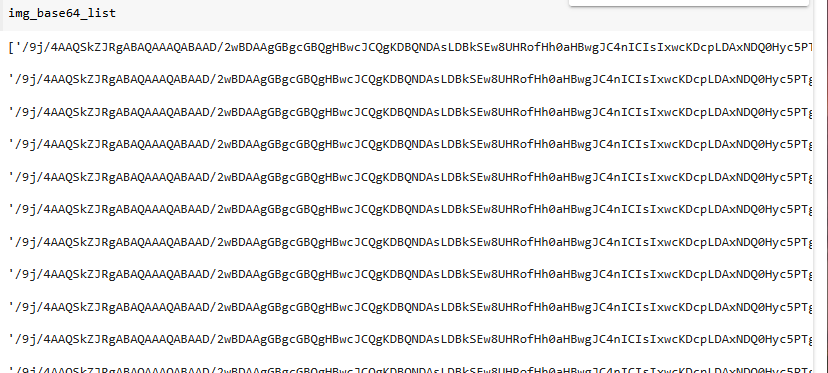

**Image Summary**

In [ ]:
# Prompt
prompt_text = """You are an assistant tasked with summarizing text for retrieval. \
    These summaries will be embedded and used to retrieve the raw text elements. \
    Give a concise summary of the table or text that is well optimized for retrieval.text: {element} """


In [ ]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [ ]:
import base64
import httpx
from langchain_core.messages import HumanMessage

image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
image_data = base64.b64encode(httpx.get(image_url).content).decode("utf-8")
message = HumanMessage(
    content=[
        {"type": "text", "text": "describe the weather in this image"},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{image_data}"},
        },
    ]
)
ai_msg = model.invoke([message])
ai_msg.content

"The weather appears to be sunny and fair. The sky is mostly blue with scattered white clouds, some wispy and others slightly more defined.  There's enough light to suggest it's daytime, likely afternoon or early evening given the angle of the sun implied by the shadows.  There's no indication of rain or strong wind. The grass looks dry and undisturbed."

**Text Summary**

In [ ]:
len(Text)

128

In [ ]:
list = []
for text in Text:
  list.append(len(text))

In [ ]:
print(sorted(list))

[21, 21, 21, 21, 22, 35, 37, 42, 42, 42, 42, 42, 42, 47, 52, 52, 57, 59, 66, 66, 68, 70, 74, 77, 82, 85, 89, 92, 96, 98, 99, 108, 118, 120, 123, 123, 126, 129, 130, 142, 143, 149, 157, 161, 176, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 186, 188, 190, 192, 192, 202, 208, 227, 227, 228, 242, 257, 289, 293, 315, 327, 356, 385, 394, 402, 423, 427, 439, 449, 449, 480, 514, 527, 534, 540, 547, 555, 570, 572, 586, 609, 610, 619, 682, 688, 689, 711, 711, 712, 713, 752, 787, 789, 796, 848, 853, 876, 882, 893, 922, 948, 1000, 1005, 1036, 1052, 1068, 1095, 1129, 1226, 1310, 1393, 1401, 1667, 1773, 2143]


In [ ]:
text_summaries = []

In [ ]:

# Prompt
prompt_text = """You are an assistant tasked with summarizing text for retrieval. \
    These summaries will be embedded and used to retrieve the raw text elements. \
    Give a concise summary of the table or text that is well optimized for retrieval.text: {element} """



In [ ]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [ ]:
# Text summary chain
model = ChatGoogleGenerativeAI( model="gemini-2.0-flash-exp", temperature=0)

summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()


In [ ]:
text_summaries = summarize_chain.batch(Text, {"max_concurrency": 5})

ResourceExhausted: 429 Resource has been exhausted (e.g. check quota).

Basically isme hr ek 128 chunks ka summarization hota hai output me. Same 128 size ki new list 'text_summaries' banegi, but all the texts will be summarized now.

like this

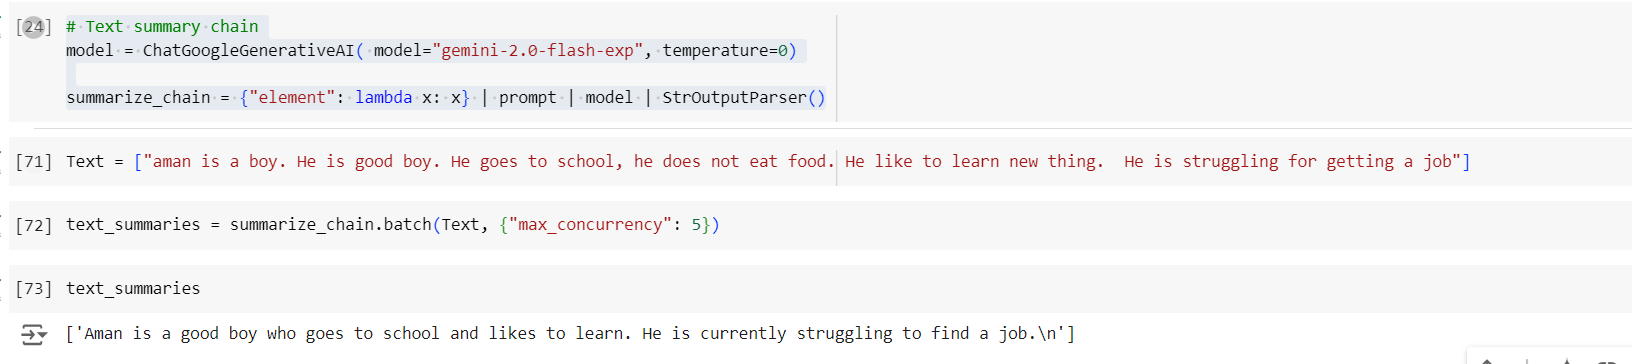

Hamare me limit hai shayad kuch bahut sare responses ek sath summrization ke liye nhi bhej pa rha hai.

how to do the same using for loop creating an artifical 2 second delay for each string of the 'Text' list

We have to use different methadology. Now

In [ ]:
# custom summarization chain

from langchain.schema import Document
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

# Define the prompt template
prompt = ChatPromptTemplate.from_template("Summarize this content: {context}")

# Create the summarization chain
chain = create_stuff_documents_chain(model, prompt)

# Wrap your input in a Document object
input_document = [Document(page_content="My name is amam")]

# Pass the Document objects within a dictionary under the "context" key
result = chain.invoke({"context": input_document})
print(result)


The content is a simple statement: "My name is amam." It indicates that the speaker's name is "amam".



In [ ]:
from langchain.schema import Document
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

# Define the prompt template
prompt = ChatPromptTemplate.from_template("Summarize this content: {context}")

# Create the summarization chain
chain = create_stuff_documents_chain(model, prompt)

# Your list of strings
input_strings = ["My name is amam", "LangChain is a framework for AI applications.", "Python is a versatile programming language."]

# Summarize each string and store the results
summarized_results = []
for text in input_strings:
    input_document = [Document(page_content=text)]  # Wrap each string in a Document object
    result = chain.invoke({"context": input_document})  # Summarize the content
    summarized_results.append(result)  # Append the result to the list

# Print the summarized results
print(summarized_results)
print(len(summarized_results))

['The content is a simple statement: "My name is amam." It indicates that the speaker\'s name is "amam".\n', "LangChain is a software tool that helps developers build applications powered by artificial intelligence. Essentially, it's a framework designed to make it easier to create AI-driven software.\n", 'Python is a flexible programming language that can be used for many different tasks.\n']
3


In [ ]:
len(Text)

128

In [ ]:
Text[0]

'Plant Biotechnology Journal (2022) 20, pp. 2357–2371'

In [ ]:
model = ChatGoogleGenerativeAI( model="gemini-2.0-flash-exp", temperature=0, max_tokens = 1000)

from langchain.schema import Document
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

# Define the prompt template
prompt = ChatPromptTemplate.from_template("Summarize this content: {context}")

# Create the summarization chain
chain = create_stuff_documents_chain(model, prompt)

# Your list of strings
input_strings = Text # yhi hai inpt string is bar

# Summarize each string and store the results
text_summaries = []
i = 0 # to check ki kitne responses are accepted simultaneously
for text in input_strings:
    input_document = [Document(page_content=text)]  # Wrap each string in a Document object
    result = chain.invoke({"context": input_document})  # Summarize the content
    text_summaries.append(result)  # Append the result to the list
    i += 1
    print(i)

# Print the summarized results
print(text_summaries)
print(len(text_summaries))

1
2
3
4
5
6
7
8
9
10


11


ResourceExhausted: 429 Resource has been exhausted (e.g. check quota).

So after 10 calls showing response limit exhausted.

please do something to add 2 second delay after each 5 calls

In [ ]:
import time
from langchain.schema import Document
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

# Define the prompt template
prompt = ChatPromptTemplate.from_template("Summarize this content: {context}")

# Create the summarization chain
chain = create_stuff_documents_chain(model, prompt)

# Your list of strings
input_strings = Text  # Replace with your input strings

# Summarize each string and store the results
text_summaries = []
i = 0  # Counter for the number of calls

for text in input_strings:
    input_document = [Document(page_content=text)]  # Wrap each string in a Document object
    result = chain.invoke({"context": input_document})  # Summarize the content
    text_summaries.append(result)  # Append the result to the list
    i += 1
    print(i)

    # Add a delay after every 5 calls
    if i % 5 == 0:
        print("Adding a delay after 5 calls...")
        time.sleep(2)  # Wait for 2 seconds

# Print the summarized results
print(text_summaries)
print(len(text_summaries))

1
2
3
4
5
Adding a delay after 5 calls...
6
7
8
9
10
Adding a delay after 5 calls...
11
12
13
14
15
Adding a delay after 5 calls...
16
17
18
19
20
Adding a delay after 5 calls...


ResourceExhausted: 429 Resource has been exhausted (e.g. check quota).

So 20 api calls ke bad new delay dalna padega

**The Gemini API has different usage limits depending on the type of API entry point and the pricing plan:
Free: 15 requests per minute (RPM), 1 million tokens per minute (TPM), and 1,500 requests per day (RPD)**

for being safer side let's after 15 api calls add 1 min delay

In [ ]:
import time
from langchain.schema import Document
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

# Define the prompt template
prompt = ChatPromptTemplate.from_template("Summarize this content: {context}")

# Create the summarization chain
chain = create_stuff_documents_chain(model, prompt)

# Your list of strings
input_strings = Text  # Replace with your input strings

# Summarize each string and store the results
text_summaries = []
i = 0  # Counter for the number of calls

for text in input_strings:
    input_document = [Document(page_content=text)]  # Wrap each string in a Document object
    result = chain.invoke({"context": input_document})  # Summarize the content
    text_summaries.append(result)  # Append the result to the list
    i += 1
    print(i)

    # Add a delay after every 5 calls
    if i % 5 == 0:
        print("Adding a delay after 5 calls...")
        time.sleep(2)  # Wait for 2 seconds

    # Add a longer delay after every 15 calls
    if i % 15 == 0:
        print("Adding a longer delay after 15 calls...")
        time.sleep(60)  # Wait for 1 minute

# Print the summarized results
print(text_summaries)
print(len(text_summaries))


1
2
3
4
5
Adding a delay after 5 calls...
6
7
8
9
10
Adding a delay after 5 calls...
11
12
13
14
15
Adding a delay after 5 calls...
Adding a longer delay after 15 calls...
16
17
18
19
20
Adding a delay after 5 calls...
21
22
23
24
25
Adding a delay after 5 calls...


26


ResourceExhausted: 429 Resource has been exhausted (e.g. check quota).

Ky bat hai yar. Samjh nhi aa rha. Actual me gemini api limit kya hai.

Requests per second	 =  2

Here's the updated code with a 30-second delay after each API request and all previous delay options removed:

In [ ]:
import time
from langchain.schema import Document
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

# Define the prompt template
prompt = ChatPromptTemplate.from_template("Summarize this content: {context}")

# Create the summarization chain
chain = create_stuff_documents_chain(model, prompt)

# Your list of strings
input_strings = Text  # Replace with your input strings

# Summarize each string and store the results
text_summaries = []
i = 0  # Counter for the number of calls

for text in input_strings:
    input_document = [Document(page_content=text)]  # Wrap each string in a Document object
    result = chain.invoke({"context": input_document})  # Summarize the content
    text_summaries.append(result)  # Append the result to the list
    i += 1
    print(f"Completed request {i}")

    # Add a 30-second delay after each request
    print("Waiting for 30 seconds before the next request...")
    time.sleep(30)

# Print the summarized results
print(text_summaries)
print(len(text_summaries))


Completed request 1
Waiting for 30 seconds before the next request...
Completed request 2
Waiting for 30 seconds before the next request...
Completed request 3
Waiting for 30 seconds before the next request...
Completed request 4
Waiting for 30 seconds before the next request...
Completed request 5
Waiting for 30 seconds before the next request...
Completed request 6
Waiting for 30 seconds before the next request...
Completed request 7
Waiting for 30 seconds before the next request...
Completed request 8
Waiting for 30 seconds before the next request...
Completed request 9
Waiting for 30 seconds before the next request...
Completed request 10
Waiting for 30 seconds before the next request...
Completed request 11
Waiting for 30 seconds before the next request...
Completed request 12
Waiting for 30 seconds before the next request...
Completed request 13
Waiting for 30 seconds before the next request...
Completed request 14
Waiting for 30 seconds before the next request...
Completed reque

Finally after keeping 30 sec time lapse between 2 lllm api calls, I am able to summarize all the 128 text pieces.

In [ ]:
text_summaries[0]

'Please provide me with the content you would like me to summarize. I need the actual text of the article from the Plant Biotechnology Journal (2022) 20, pp. 2357–2371 to give you a summary. \n\nWithout the content, I can only tell you that this is a journal article published in the Plant Biotechnology Journal in 2022, specifically on pages 2357 to 2371. \n\n**Once you provide the text, I will be happy to summarize it for you.**\n'

In [ ]:
text_summaries[4]

'This is a publication timeline and contact information. It indicates that a piece of work (likely a research paper) was:\n\n*   **Received:** June 17, 2022\n*   **Revised:** August 11, 2022\n*   **Accepted:** August 13, 2022\n\nIt also provides the contact information for the corresponding author:\n\n*   **Phone:** +86-15827398206\n*   **Fax:** +86-27-87280916\n*   **Email:** gwwang@mail.hzau.edu.cn\n\nThis information is typically found in academic publications and shows the progression of the work through the peer-review process and provides a way to contact the author.\n'

In [ ]:
text_summaries[10]

"This text discusses the use of genetic and genomic data to understand the genetic basis of traits in rice. Here's a summary:\n\n* **Rice is important:** Rice is a key crop in Asia and a model for genetic improvement.\n* **Lots of data:** Researchers have gathered extensive data on rice genotypes (genetic makeup) and phenotypes (observable traits).\n* **GWAS limitations:** Genome-wide association studies (GWAS) have identified associations between genes and traits, but they struggle to pinpoint specific genes and their functions due to limitations like linkage disequilibrium and incomplete gene annotation.\n* **New approaches:** To overcome these limitations, researchers are using methods like transcriptome-wide association studies (TWAS) and Camoco. These methods combine genomic and transcriptomic data (gene expression levels) to more accurately predict candidate genes for specific traits.\n* **eQTLs and co-localized QTLs are important:** The text also mentions the importance of expre

In [ ]:
text_summaries[127]

"This is a copyright and publication information statement for a research article. Here's a breakdown:\n\n* **© 2022 The Authors:** This indicates that the authors of the research article hold the copyright to their work in 2022.\n* **Plant Biotechnology Journal:** This is the name of the academic journal where the article was published.\n* **published by Society for Experimental Biology and The Association of Applied Biologists and John Wiley & Sons Ltd.:** This lists the organizations involved in publishing the journal. The Society for Experimental Biology and The Association of Applied Biologists are likely scientific societies, and John Wiley & Sons Ltd. is the publishing company.\n* **20, 2357–2371:** This refers to the journal's volume (20), and the page numbers (2357-2371) where the specific article can be found.\n\n**In short, this statement tells us that a research article was published in the Plant Biotechnology Journal in 2022, authored by individuals who retain copyright, a

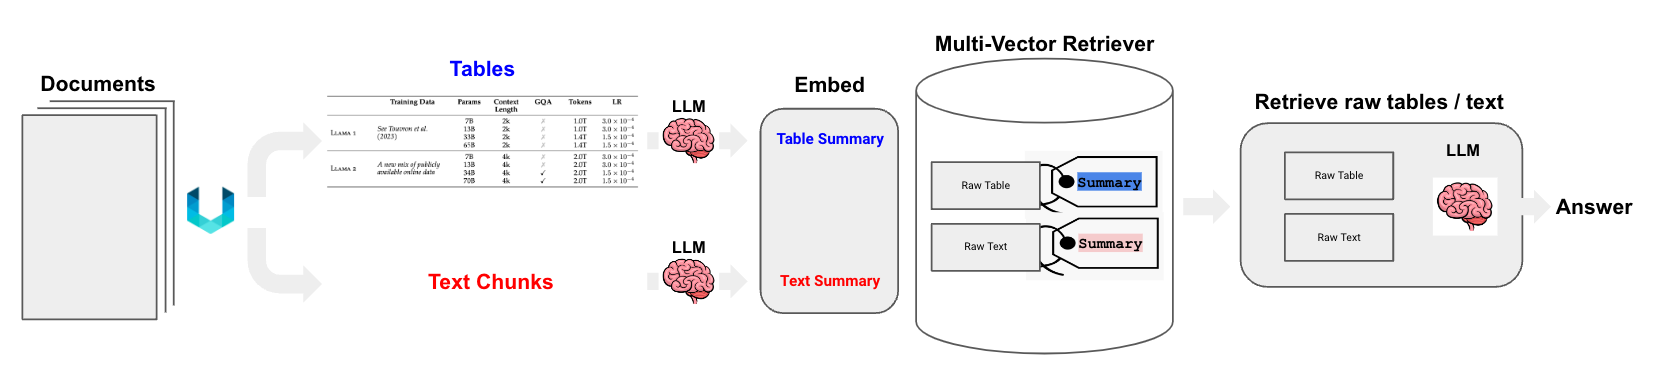

#**3. MultiVectorRetriever**

In [ ]:
!pip install -qU "langchain-chroma>=0.1.2"

In [ ]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_chroma import Chroma # in memory database
from langchain_core.documents import Document
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [ ]:
def create_multi_vector_retriever(vectorstore, text_summaries, texts,
                                  table_summaries, tables, image_summaries, images):
    """
    Create retriever that indexes summaries, but returns raw images or texts
    """

    # Initialize the storage layer
    store = InMemoryStore()
    id_key = "doc_id"

    # Create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key,
    )


    # Helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):

      doc_ids = [str(uuid.uuid4()) for _ in doc_contents]

      summary_docs = [
              Document(page_content=s, metadata={id_key: doc_ids[i]})
              for i, s in enumerate(doc_summaries)
          ]

      retriever.vectorstore.add_documents(summary_docs)
      retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

      # Add texts, tables, and images
      # Check that text_summaries is not empty before adding
      if text_summaries:
          add_documents(retriever, text_summaries, texts)
      # Check that table_summaries is not empty before adding
      if table_summaries:
          add_documents(retriever, table_summaries, tab)
      # Check that image_summaries is not empty before adding
      if image_summaries:
          add_documents(retriever, image_summaries, img)

    return retriever


In [ ]:
# vectorstore = Chroma(
#     collection_name="mm_rag", embedding_function = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
# )

# Example usage
vectorstore = Chroma(
    collection_name="mm_rag",
    embedding_function=GoogleGenerativeAIEmbeddings(model="models/embedding-001")
)

In [ ]:
vectorstore

In [ ]:
text_summaries

# ok fine.

In [ ]:
Text

# ok fine

In [ ]:
table_summaries

['This table lists genes with their chromosome location, base pair position, p-value, FDR, gene symbols, and annotation. It includes genes like NBS-LRR disease resistance protein, TBC domain-containing protein, and various other proteins with associated functions.\n']

In [ ]:
tab

['Gene_ID CHR bp P_value FDR Symbols. Annotation LOC_Os02g02670 Chr02 991 974 1.10 x 10-8 0.00014514 NBS-LRR disease resistance protein LOC_Os05g38950 ChrOS 22 838 503 1.24 x 10-8 0.00014514 TBC domain-containing protein LOC_Os09g27650 Chro9 16 823 960 7.31 x 10° 0.0005681 OsIDD13 ZOS9-14-C2H2 zinc finger protein LOC_Os02g02690 Chr02 1.010 137 2.77 x 10-7 0.00161314 Expressed protein LOC_Os01g04920 Chr01 2 276 969 1.24 x 10-6 0.00482646 OsSQD2 Glycosyl transferase, group 1 domain-containing protein LOC_Os05945770 ChrOS 26 508 840 1.22 x 10-° 0.00482646 Divergent PAP2 family domain-containing protein LOC_Os02956120 Chr02 34 349 219 1.66 x 10°° 0.00483869 OsIAAQ OsIAA9-Auxin-responsive Aux/IAA gene family member LOC_Os07g14700 Chr07 8 382 541 1.57 x 10°© 0.00483869 Harpin-induced protein 1 domain-containing protein LOC_Os02g27190 Chr02 16 001 144 2.02 x 10°° 0.00522673 Expressed protein LOC_Os02938040 Chr02 22 980 200 3.92 x 10°° 0.0091447 OsIRL2 Leucine-rich repeat family protein, putat

In [ ]:
image_summaries

['Green banner with "Plant Biotechnology Journal" text, "Open Access" label, and logos for "aab" and "SEB".',
 'Three sets of plant leaves, labeled NIP, bhlh026-cri, and bHLH026-OX, showing varying degrees of yellowing and browning.',
 'This image shows a metabolic pathway diagram (a) with associated bar graphs showing relative expression levels (b) and relative peak areas of various compounds (c, d). It also includes a photo of plant leaves (e) and a bar graph showing lesion length (f). The pathway diagram shows the synthesis of various compounds from GGPP, including Oryzalexin S, Momilactones A&B, Oryzalides A-C, Phytocassanes A-E, and Oryzalexins A-F. The bar graphs compare the expression and peak areas in different plant lines (NIP, bhlh026-cri, and bHLH026-OX). The leaf photo shows the visual difference in lesion development between the NIP and bHLH026-OX lines. The lesion length graph shows the average lesion length for the different lines.',
 'The image shows population structur

In [ ]:
img_base64_list

# ok fine

In [ ]:
# Create retriever
# retriever_multi_vector_img = create_multi_vector_retriever(
#     vectorstore,
#     text_summaries,
#     Text,
#     table_summaries,
#     tab, # Table
#     image_summaries,
#     img_base64_list,
# )

retriever = create_multi_vector_retriever(
    vectorstore,
    text_summaries = text_summaries,
    texts = Text,
    table_summaries = table_summaries,
    tables = tab,
    image_summaries = image_summaries,
    images = img_base64_list
)

In [ ]:
retriever_multi_vector_img

MultiVectorRetriever(vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x78c695303310>, docstore=<langchain_core.stores.InMemoryStore object at 0x78c695300a30>, search_kwargs={})

In [ ]:

import io
import re

from IPython.display import HTML, display
from PIL import Image


In [ ]:
from IPython.display import display, HTML

def plt_img_base64(img_base64):
    """Display base64 encoded string as an image in Google Colab"""
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/png;base64,{img_base64}" alt="Image" style="max-width:100%;"/>'
    # Display the image by rendering the HTML
    display(HTML(image_html))



In [ ]:
img_base64_list[0]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCABvBTsDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDjaKKKwPjQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiig


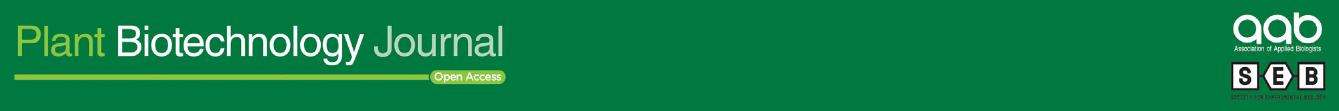

In [ ]:
# Example usage
# Ensure img_base64_list[4] is a valid base64 string without line breaks
plt_img_base64(img_base64_list[0])

**Main method for creating a RAG**

In [ ]:
# 6.
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

def multi_modal_rag_chain(retriever):
    """
    Multi-modal RAG chain
    """

    # Multi-modal LLM
    # model = ChatOpenAI(temperature=0, model="gpt-4-vision-preview", max_tokens=1024)

    model = ChatGoogleGenerativeAI( model="gemini-2.0-flash-exp", temperature=0)


    # RAG pipeline
    chain = (
        {
            "context": retriever | RunnableLambda(split_image_text_types),
            "question": RunnablePassthrough(),
        }
        | RunnableLambda(img_prompt_func)
        | model
        | StrOutputParser()
    )

    return chain

In [ ]:
# 4.
def split_image_text_types(docs): # docs = image / table / text
    """
    Split base64-encoded images and texts
    """
    b64_images = []
    texts = []

    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            doc = resize_base64_image(doc, size=(1300, 600))
            b64_images.append(doc)
        else:
            texts.append(doc)

    return {"images": b64_images, "texts": texts}


In [ ]:
# 3.
def resize_base64_image(base64_string, size=(128, 128)):
    """
    Resize an image encoded as a Base64 string
    """
    # Decode the Base64 string
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # Resize the image
    resized_img = img.resize(size, Image.LANCZOS)

    # Save the resized image to a bytes buffer
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # Encode the resized image to Base64
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [ ]:
# 2.
def is_image_data(b64data):
    """
    Check if the base64 data is an image by looking at the start of the data
    """
    image_signatures = {
        b"\xFF\xD8\xFF": "jpg",
        b"\x89\x50\x4E\x47\x0D\x0A\x1A\x0A": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False


In [ ]:
# 1.
def looks_like_base64(sb):
    """Check if the string looks like base64"""
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None

In [ ]:
# 5.
def img_prompt_func(data_dict):
    """
    Join the context into a single string
    """
    #print(data_dict)
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)

    # Adding the text for analysis
    text_message = {
        "type": "text",
        "text": (
            "You are a helpful assistant.\n"
            "You will be given a mixed info(s) .\n"
            "Use this information to provide relevant information to the user question. \n"
            f"User-provided question: {data_dict['question']}\n\n"
            "Text and / or tables:\n"
            f"{formatted_texts}"
            "Please provide data from the given cextorstore database only. If the data is not present in the vectorstore simply say you don't know"
        ),
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]

In [ ]:
# Create RAG chain
chain_multimodal_rag = multi_modal_rag_chain(retriever_multi_vector_img)

In [ ]:
chain_multimodal_rag

{
  context: MultiVectorRetriever(vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x78c695303310>, docstore=<langchain_core.stores.InMemoryStore object at 0x78c695300a30>, search_kwargs={})
           | RunnableLambda(split_image_text_types),
  question: RunnablePassthrough()
}
| RunnableLambda(img_prompt_func)
| ChatGoogleGenerativeAI(model='models/gemini-2.0-flash-exp', google_api_key=SecretStr('**********'), temperature=0.0, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x78c695300580>, default_metadata=())
| StrOutputParser()

**Check**

In [ ]:
# Check retrieval : now you can ask questions from images, or texts
query = "What is the definition of the eQTL"
docs = retriever_multi_vector_img.invoke(query)

In [ ]:
docs

[]

In [ ]:
query = "What is the definition of the eQTL"
docs = chain_multimodal_rag.invoke(query)

In [ ]:
docs

"I don't know.\n"

In [ ]:
# asking from an image now

chain_multimodal_rag.invoke("What is the GWAS of Starch vs -log10(p) graph results?")

"I don't know.\n"

In [ ]:
chain_multimodal_rag.invoke("What is the yeast one hybrid assay. Why is it used for")

"I don't know.\n"

In [ ]:
chain_multimodal_rag.invoke("What do you about the Indian Railways?")

"I don't know.\n"

In [ ]:
chain_multimodal_rag.invoke("What d you know")

'Okay, I understand. I will only provide information that is present within the "cextorstore" database. If the answer to your question is not found there, I will respond with "I don\'t know."\n'

In [ ]:
chain_multimodal_rag.invoke("Can you summarize the content?")

'Okay, I understand. I will only provide information that is present within the "cextorstore" database. If the answer to your question is not found there, I will respond with "I don\'t know." \n\nPlease provide the content you would like me to summarize.\n'

In [ ]:
# File path
file_path = "my_list.txt"

# Separator
separator = "####****####"

# Save the list to a text file with the separator
with open(file_path, "w") as file:
    file.write(separator.join(text_summaries))

print(f"List saved to {file_path} with separator '{separator}'")

List saved to my_list.txt with separator '####****####'
